# Modelling with Time Series
#### *use the `sktime` conda environment*

### Contents:
 - [Import for Time Series Models](#Import-for-Time-Series-Models)
 - [Set X and y and TTS](#Set-X-and-y-and-TTS)
 - [Plot Data and Null Model](#Plot-Data-and-Null-Model)
 - [Model by Months](#Model-by-Months)
   - [Seasonal Model by Months](#Seasonal-Model-by-Months)
   - [SARIMA by Months](#SARIMA-by-Months)
   - [Holt-Winters, Auto by Months](#Holt-Winters,-Auto-by-Months)
   - [Holt-Winters, Manual by Months](#Holt-Winters,-Manual-by-Months)
   - [Ensemble Forecasts by Months](#Ensemble-Forecasts-by-Months)
 - [Model by Weeks](#Model-by-Weeks)
   - [Seasonal Model by Weeks](#Seasonal-Model-by-Weeks)
   - [SARIMA by Weeks](#SARIMA-by-Weeks)
   - [Holt-Winters, Auto by Weeks](#Holt-Winters,-Auto-by-Weeks)
   - [Holt-Winters, Manual by Weeks](#Holt-Winters,-Manual-by-Weeks)
   - [Ensemble Forecasts, by Weeks](#Ensemble-Forecasts,-by-Weeks)
 - [Save Time Series Model](#Save-Time-Series-Model)


## Import for Time Series Models
[(back to top)](#Modelling-with-Time-Series)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

import warnings
warnings.simplefilter('ignore')

from sklearn.metrics import mean_squared_error as mse

In [2]:
from statsmodels.tsa.api import SimpleExpSmoothing, ExponentialSmoothing
import statsmodels
statsmodels.__version__

'0.12.2'

In [3]:
import pmdarima as pmd
from pmdarima.utils import tsdisplay

In [4]:
import sktime
sktime.__version__

'0.6.1'

In [5]:
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.datasets import load_airline
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.arima import AutoARIMA
from sktime.forecasting.ets import AutoETS
from sktime.utils.plotting import plot_series
from sktime.forecasting.compose import EnsembleForecaster

import pickle

In [6]:
df = pd.read_csv('../data/cleaned_aqi_and_temp_data_2017-2019.csv', parse_dates=True, index_col='date')
df_w = pd.read_csv('../data/cleaned_aqi_and_temp_data_2017-2019.csv', parse_dates=True, index_col='date')
df_m = pd.read_csv('../data/cleaned_aqi_and_temp_data_2017-2019.csv', parse_dates=True, index_col='date')

In [7]:
df_w = df_w.resample('W').max()
df_w.index = df_w.index.to_period('W')
df_w.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 158 entries, 2016-12-26/2017-01-01 to 2019-12-30/2020-01-05
Freq: W-SUN
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   co_max          158 non-null    float64
 1   co_aqi_val      158 non-null    float64
 2   no2_max         158 non-null    float64
 3   no2_aqi_val     158 non-null    float64
 4   ozone_max       158 non-null    float64
 5   ozone_aqi_val   158 non-null    float64
 6   pm10_mean       154 non-null    float64
 7   pm10_aqi_val    154 non-null    float64
 8   pm2.5_mean      157 non-null    float64
 9   pm2.5_aqi_val   157 non-null    float64
 10  so2_max         158 non-null    float64
 11  so2_aqi_val     158 non-null    float64
 12  cumulative_aqi  158 non-null    int64  
 13  temp_high       158 non-null    int64  
 14  temp_low        158 non-null    int64  
 15  temp_avg        158 non-null    float64
 16  month           158 non-null 

In [8]:
df_m = df_m.resample('M').max()
df_m.index = df_m.index.to_period('M')
df_m.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 36 entries, 2017-01 to 2019-12
Freq: M
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   co_max          36 non-null     float64
 1   co_aqi_val      36 non-null     float64
 2   no2_max         36 non-null     float64
 3   no2_aqi_val     36 non-null     float64
 4   ozone_max       36 non-null     float64
 5   ozone_aqi_val   36 non-null     float64
 6   pm10_mean       36 non-null     float64
 7   pm10_aqi_val    36 non-null     float64
 8   pm2.5_mean      36 non-null     float64
 9   pm2.5_aqi_val   36 non-null     float64
 10  so2_max         36 non-null     float64
 11  so2_aqi_val     36 non-null     float64
 12  cumulative_aqi  36 non-null     int64  
 13  temp_high       36 non-null     int64  
 14  temp_low        36 non-null     int64  
 15  temp_avg        36 non-null     float64
 16  month           36 non-null     int64  
 17  weekday         3

In [9]:
df.index = df.index.to_period('D')
df.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 1093 entries, 2017-01-01 to 2019-12-31
Freq: D
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   co_max          1062 non-null   float64
 1   co_aqi_val      1062 non-null   float64
 2   no2_max         1038 non-null   float64
 3   no2_aqi_val     1038 non-null   float64
 4   ozone_max       1057 non-null   float64
 5   ozone_aqi_val   1057 non-null   float64
 6   pm10_mean       1050 non-null   float64
 7   pm10_aqi_val    1050 non-null   float64
 8   pm2.5_mean      980 non-null    float64
 9   pm2.5_aqi_val   980 non-null    float64
 10  so2_max         1073 non-null   float64
 11  so2_aqi_val     1073 non-null   float64
 12  cumulative_aqi  1093 non-null   int64  
 13  temp_high       1093 non-null   int64  
 14  temp_low        1093 non-null   int64  
 15  temp_avg        1093 non-null   float64
 16  month           1093 non-null   int64  
 17  weekday  

In [10]:
df.columns

Index(['co_max', 'co_aqi_val', 'no2_max', 'no2_aqi_val', 'ozone_max',
       'ozone_aqi_val', 'pm10_mean', 'pm10_aqi_val', 'pm2.5_mean',
       'pm2.5_aqi_val', 'so2_max', 'so2_aqi_val', 'cumulative_aqi',
       'temp_high', 'temp_low', 'temp_avg', 'month', 'weekday'],
      dtype='object')

## Set X and y and TTS
[(back to top)](#Modelling-with-Time-Series)

In [11]:
X = df.drop(columns=['cumulative_aqi'])
y = df['cumulative_aqi']

In [12]:
X_train = X[X.index.year < 2019]
X_test = X[X.index.year == 2019]
y_train = y[y.index.year < 2019]
y_test = y[y.index.year == 2019]

In [13]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(728, 17)
(365, 17)
(728,)
(365,)


In [14]:
X_w = df_w.drop(columns=['cumulative_aqi'])
y_w = df_w['cumulative_aqi']

In [15]:
X_w_train = X_w[X_w.index.year < 2019]
X_w_test = X_w[X_w.index.year == 2019]
y_w_train = y_w[y_w.index.year < 2019]
y_w_test = y_w[y_w.index.year == 2019]

In [16]:
X_m = df_m.drop(columns=['cumulative_aqi'])
y_m = df_m['cumulative_aqi']

In [17]:
X_m_train = X_m[X_m.index.year < 2019]
X_m_test = X_m[X_m.index.year == 2019]
y_m_train = y_m[y_m.index.year < 2019]
y_m_test = y_m[y_m.index.year == 2019]

## Plot Data and Null Model
[(back to top)](#Modelling-with-Time-Series)

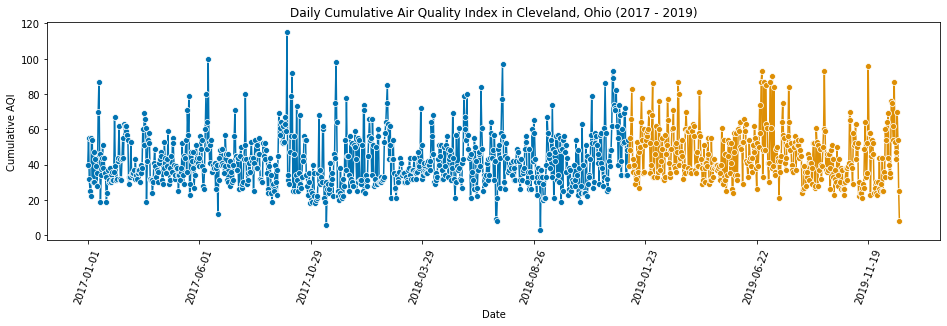

In [18]:
plot_series(y_train, y_test)
plt.xticks(rotation=70)
plt.xlabel('Date')
plt.ylabel('Cumulative AQI')
plt.title('Daily Cumulative Air Quality Index in Cleveland, Ohio (2017 - 2019)');

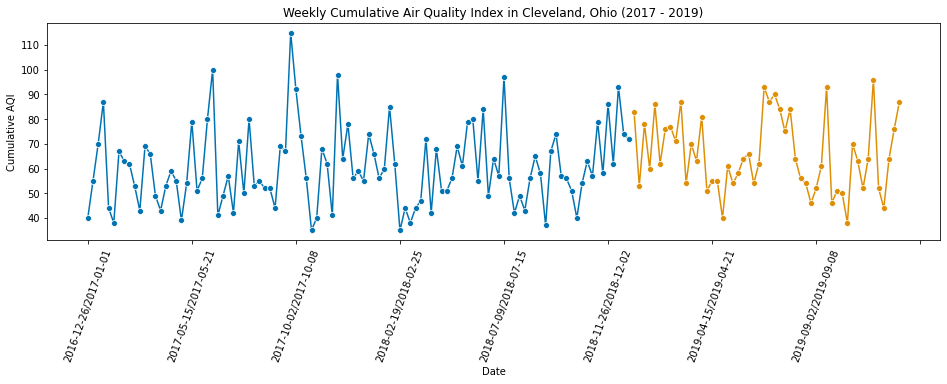

In [19]:
plot_series(y_w_train, y_w_test)
plt.xticks(rotation=70)
plt.xlabel('Date')
plt.ylabel('Cumulative AQI')
plt.title('Weekly Cumulative Air Quality Index in Cleveland, Ohio (2017 - 2019)');

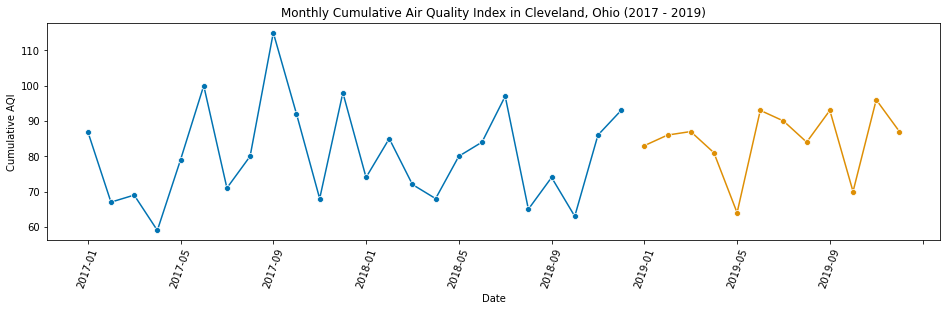

In [20]:
plot_series(y_m_train, y_m_test)
plt.xticks(rotation=70)
plt.xlabel('Date')
plt.ylabel('Cumulative AQI')
plt.title('Monthly Cumulative Air Quality Index in Cleveland, Ohio (2017 - 2019)');

#### Null Model (last value)

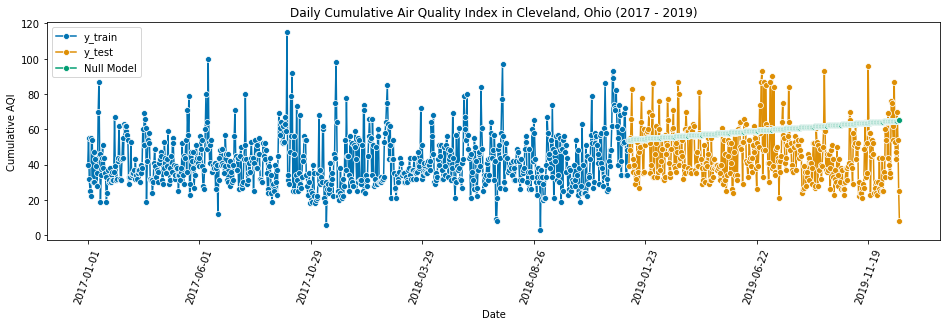

In [21]:
null_model = NaiveForecaster(strategy='drift')
null_model.fit(y_train)
null_line = null_model.predict(list(range(1, len(y_test) + 1)))
plot_series(y_train, y_test, null_line, labels=['y_train', 'y_test', 'Null Model'])
plt.xticks(rotation=70)
plt.xlabel('Date')
plt.ylabel('Cumulative AQI')
plt.title('Daily Cumulative Air Quality Index in Cleveland, Ohio (2017 - 2019)');

In [22]:
round(mse(y_test, null_line, squared=False), 0)

21.0

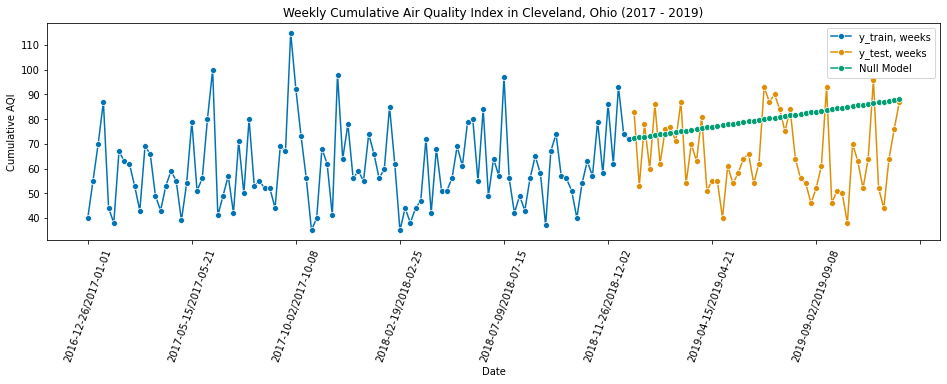

In [23]:
null_model_w = NaiveForecaster(strategy='drift')
null_model_w.fit(y_w_train)
null_line_w = null_model_w.predict(list(range(1, len(y_w_test) + 1)))
plot_series(y_w_train, y_w_test, null_line_w,labels=['y_train, weeks', 'y_test, weeks', 'Null Model'])
plt.xticks(rotation=70)
plt.xlabel('Date')
plt.ylabel('Cumulative AQI')
plt.title('Weekly Cumulative Air Quality Index in Cleveland, Ohio (2017 - 2019)');


In [24]:
round(mse(y_w_test, null_line_w, squared=False), 0)

22.0

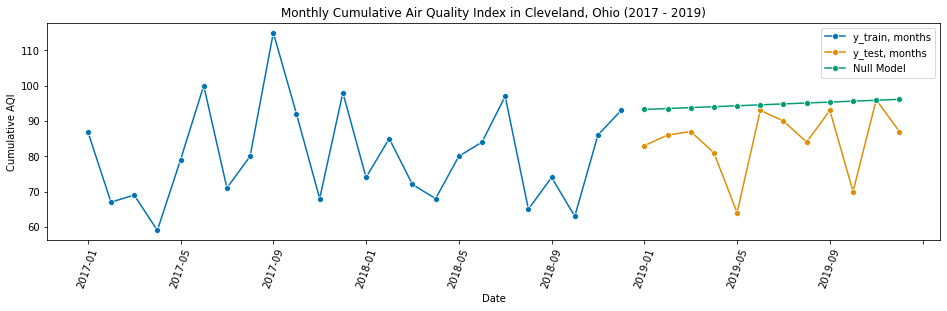

In [25]:
null_model_m = NaiveForecaster(strategy='drift')
null_model_m.fit(y_m_train)
null_line_m = null_model_m.predict(list(range(1, len(y_m_test) + 1)))
plot_series(y_m_train, y_m_test, null_line_m,labels=['y_train, months', 'y_test, months', 'Null Model'])
plt.xticks(rotation=70)
plt.xlabel('Date')
plt.ylabel('Cumulative AQI')
plt.title('Monthly Cumulative Air Quality Index in Cleveland, Ohio (2017 - 2019)');


In [26]:
round(mse(y_m_test, null_line_m, squared=False), 0)

14.0

# Model by Months
[(back to top)](#Modelling-with-Time-Series)

## Seasonal Model by Months
[(back to top)](#Modelling-with-Time-Series)

In [27]:
num_months = list(range(1, len(y_m_test) + 1))

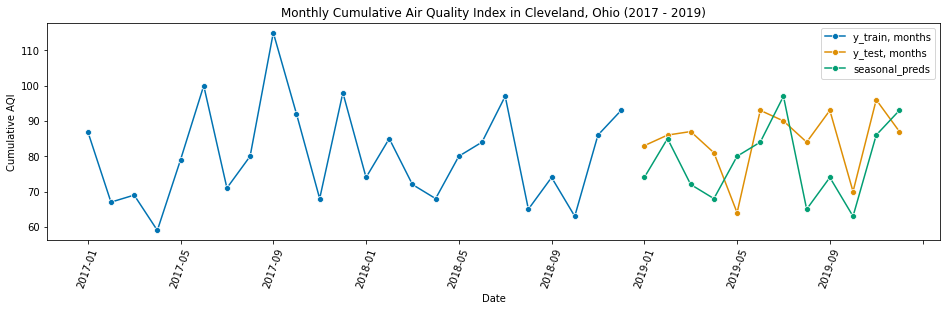

In [28]:
# Seasonal
naive_seasonal_m = NaiveForecaster(strategy='last', sp=12)
naive_seasonal_m.fit(y_m_train)
naive_seasonal_preds_m = naive_seasonal_m.predict(num_months)
plot_series(y_m_train, y_m_test, naive_seasonal_preds_m, labels=['y_train, months', 'y_test, months', 'seasonal_preds'])
plt.xticks(rotation=70)
plt.xlabel('Date')
plt.ylabel('Cumulative AQI')
plt.title('Monthly Cumulative Air Quality Index in Cleveland, Ohio (2017 - 2019)');

In [29]:
round(mse(y_m_test, naive_seasonal_preds_m, squared=False), 0)

12.0

## SARIMA by Months
[(back to top)](#Modelling-with-Time-Series)

This appears "muted" with low peaks and shallow valleys, but scores best so far.

In [30]:
sarima_model_m = AutoARIMA(sp=12, trace=True)
sarima_model_m.fit(y_m_train)

Performing stepwise search to minimize aic


c:\programdata\anaconda3\envs\sktime_new\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.59 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=197.325, Time=0.00 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=201.298, Time=0.21 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=201.295, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=281.274, Time=0.00 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=199.303, Time=0.10 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=199.303, Time=0.04 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=201.303, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=199.319, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=199.316, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=201.236, Time=0.04 sec

Best model:  ARIMA(0,0,0)(0,0,0)[12] intercept
Total fit time: 1.172 seconds


AutoARIMA(sp=12, trace=True)

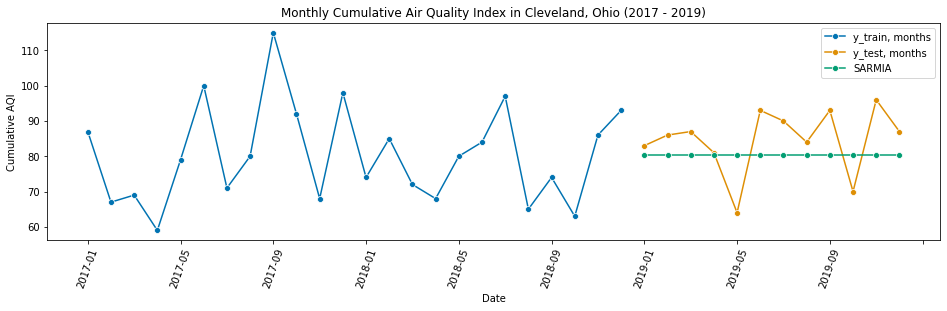

In [31]:
sarima_preds_m = sarima_model_m.predict(num_months)
plot_series(y_m_train, y_m_test, sarima_preds_m, labels=['y_train, months', 'y_test, months', 'SARMIA'])
plt.xticks(rotation=70)
plt.xlabel('Date')
plt.ylabel('Cumulative AQI')
plt.title('Monthly Cumulative Air Quality Index in Cleveland, Ohio (2017 - 2019)');

In [32]:
round(mse(y_m_test, sarima_preds_m, squared=False), 0)

10.0

## Holt-Winters, Auto by Months
[(back to top)](#Modelling-with-Time-Series)


In [33]:
y_m_train_float = y_m_train.astype('float64')

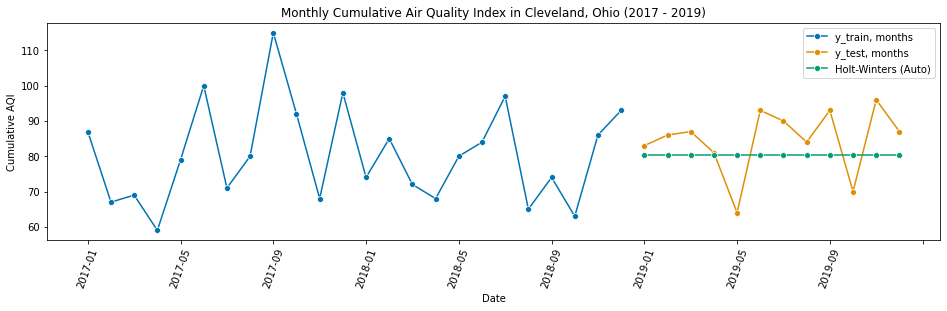

In [34]:
hw_model_m = AutoETS(auto=True, sp=12, n_jobs=-1, trace=True, disp=True)
hw_model_m.fit(y_m_train_float)

hw_preds_m = hw_model_m.predict(num_months)
plot_series(y_m_train_float, y_m_test, hw_preds_m, labels=['y_train, months', 'y_test, months', 'Holt-Winters (Auto)'])
plt.xticks(rotation=70)
plt.xlabel('Date')
plt.ylabel('Cumulative AQI')
plt.title('Monthly Cumulative Air Quality Index in Cleveland, Ohio (2017 - 2019)');

In [35]:
round(mse(y_m_test, hw_preds_m, squared=False), 0)

10.0

## Holt-Winters, Manual by Months
[(back to top)](#Modelling-with-Time-Series)

(About the same as the Auto)

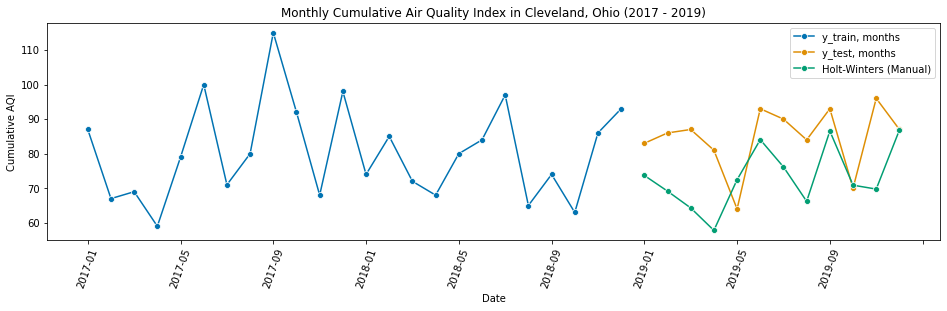

In [36]:
hwm_model_m = AutoETS(
    error='add', trend='add', seasonal='mul', 
    sp=12, n_jobs=-1, trace=True, disp=True, 
    suppress_warnings=True
)
hwm_model_m.fit(y_m_train_float)
hwm_preds_m = hwm_model_m.predict(num_months)
plot_series(y_m_train_float, y_m_test, hwm_preds_m, labels=['y_train, months', 'y_test, months', 'Holt-Winters (Manual)'])
plt.xticks(rotation=70)
plt.xlabel('Date')
plt.ylabel('Cumulative AQI')
plt.title('Monthly Cumulative Air Quality Index in Cleveland, Ohio (2017 - 2019)');

In [37]:
round(mse(y_m_test, hwm_preds_m, squared=False), 0)

15.0

## Ensemble Forecasts by Months
[(back to top)](#Modelling-with-Time-Series)

This appears to fit better than SARIMA, but the RMSE scores a little worse, but not enough to dismiss.

SARIMA / HOLT-WINTERS
---------------------



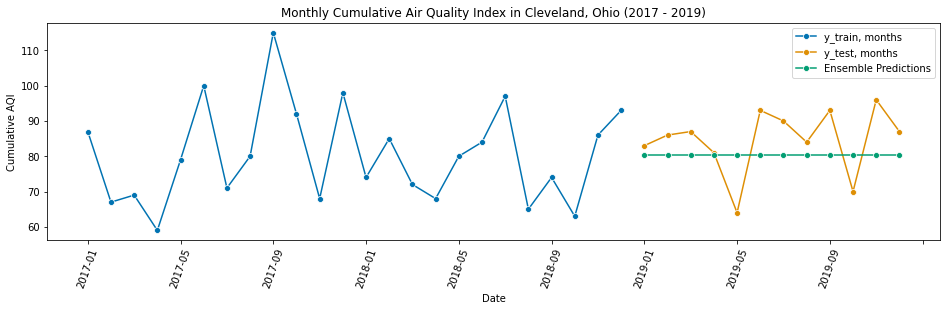

In [38]:
forecaster_m = EnsembleForecaster([
    ('sarima', sarima_model_m),
    ('hw', hw_model_m)], 
    n_jobs=-1
)

forecaster_m.fit(y_m_train_float)
ensemble_preds_m = forecaster_m.predict(num_months)
print('SARIMA / HOLT-WINTERS\n---------------------\n')
plot_series(y_m_train_float, y_m_test, ensemble_preds_m, labels=['y_train, months', 'y_test, months', 'Ensemble Predictions'])
plt.xticks(rotation=70)
plt.xlabel('Date')
plt.ylabel('Cumulative AQI')
plt.title('Monthly Cumulative Air Quality Index in Cleveland, Ohio (2017 - 2019)');

In [39]:
round(mse(y_m_test, ensemble_preds_m, squared=False), 0)

10.0

# Model by Weeks
[(back to top)](#Modelling-with-Time-Series)

## Seasonal Model by Weeks
[(back to top)](#Modelling-with-Time-Series)

In [40]:
num_days = list(range(1, len(y_test) + 1))

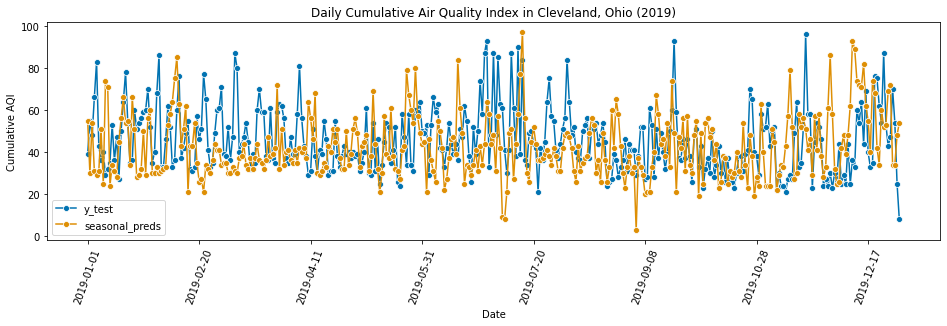

In [41]:
# Seasonal
naive_seasonal = NaiveForecaster(strategy='last', sp=365)
naive_seasonal.fit(y_train)
naive_seasonal_preds = naive_seasonal.predict(num_days)
plot_series(y_test, naive_seasonal_preds, labels=['y_test', 'seasonal_preds'])
plt.xticks(rotation=70)
plt.xlabel('Date')
plt.ylabel('Cumulative AQI')
plt.title('Daily Cumulative Air Quality Index in Cleveland, Ohio (2019)');

In [42]:
round(mse(y_test, naive_seasonal_preds, squared=False), 0)

21.0

In [43]:
num_weeks = list(range(1, len(y_w_test) + 1))

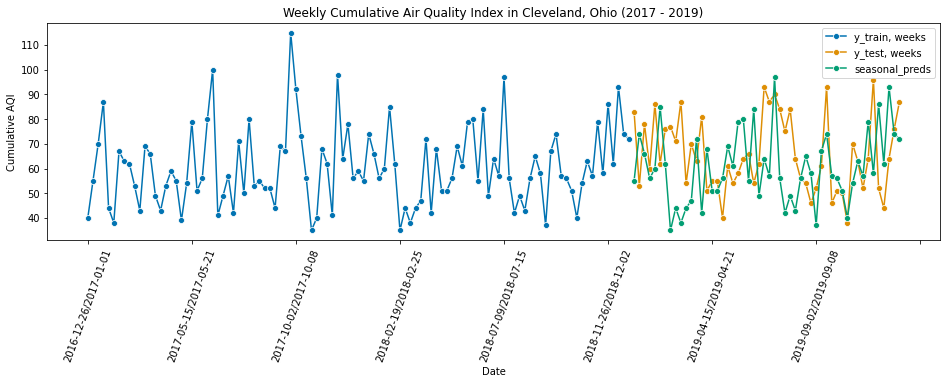

In [44]:
# Seasonal
naive_seasonal_w = NaiveForecaster(strategy='last', sp=52)
naive_seasonal_w.fit(y_w_train)
naive_seasonal_preds_w = naive_seasonal_w.predict(num_weeks)
plot_series(y_w_train, y_w_test, naive_seasonal_preds_w, labels=['y_train, weeks', 'y_test, weeks', 'seasonal_preds'])
plt.xticks(rotation=70)
plt.xlabel('Date')
plt.ylabel('Cumulative AQI')
plt.title('Weekly Cumulative Air Quality Index in Cleveland, Ohio (2017 - 2019)');

In [45]:
round(mse(y_w_test, naive_seasonal_preds_w, squared=False), 0)

21.0

## SARIMA by Weeks
[(back to top)](#Modelling-with-Time-Series)

This appears "muted" with low peaks and shallow valleys, but scores best so far.

In [46]:
sarima_model_w = AutoARIMA(sp=52, trace=True)
sarima_model_w.fit(y_w_train)

Performing stepwise search to minimize aic


c:\programdata\anaconda3\envs\sktime_new\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(2,0,2)(1,0,1)[52] intercept   : AIC=886.223, Time=7.13 sec
 ARIMA(0,0,0)(0,0,0)[52] intercept   : AIC=882.287, Time=0.00 sec
 ARIMA(1,0,0)(1,0,0)[52] intercept   : AIC=880.535, Time=2.00 sec
 ARIMA(0,0,1)(0,0,1)[52] intercept   : AIC=880.584, Time=1.39 sec
 ARIMA(0,0,0)(0,0,0)[52]             : AIC=1168.242, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[52] intercept   : AIC=881.493, Time=0.02 sec


c:\programdata\anaconda3\envs\sktime_new\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(1,0,0)(2,0,0)[52] intercept   : AIC=inf, Time=24.50 sec
 ARIMA(1,0,0)(1,0,1)[52] intercept   : AIC=882.412, Time=1.90 sec
 ARIMA(1,0,0)(0,0,1)[52] intercept   : AIC=880.422, Time=1.27 sec
 ARIMA(1,0,0)(0,0,2)[52] intercept   : AIC=inf, Time=22.09 sec


c:\programdata\anaconda3\envs\sktime_new\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(1,0,0)(1,0,2)[52] intercept   : AIC=inf, Time=25.66 sec
 ARIMA(0,0,0)(0,0,1)[52] intercept   : AIC=881.303, Time=0.68 sec
 ARIMA(2,0,0)(0,0,1)[52] intercept   : AIC=882.416, Time=3.65 sec
 ARIMA(1,0,1)(0,0,1)[52] intercept   : AIC=882.435, Time=1.61 sec
 ARIMA(2,0,1)(0,0,1)[52] intercept   : AIC=884.400, Time=2.31 sec
 ARIMA(1,0,0)(0,0,1)[52]             : AIC=933.229, Time=0.74 sec

Best model:  ARIMA(1,0,0)(0,0,1)[52] intercept
Total fit time: 95.018 seconds


AutoARIMA(sp=52, trace=True)

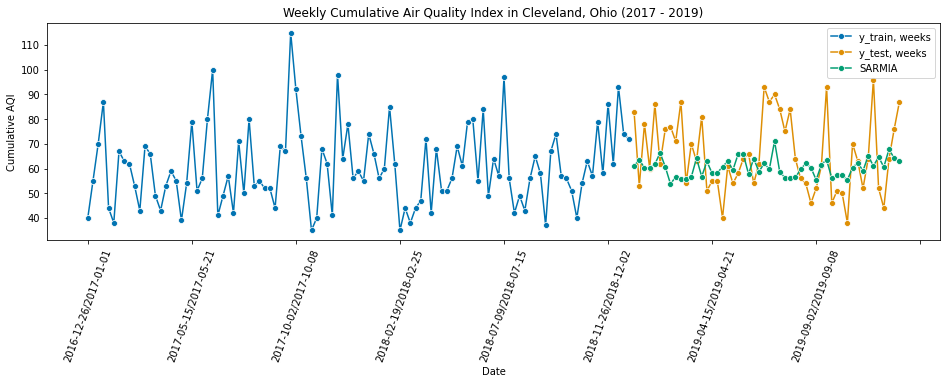

In [47]:
sarima_preds_w = sarima_model_w.predict(num_weeks)
plot_series(y_w_train, y_w_test, sarima_preds_w, labels=['y_train, weeks', 'y_test, weeks', 'SARMIA'])
plt.xticks(rotation=70)
plt.xlabel('Date')
plt.ylabel('Cumulative AQI')
plt.title('Weekly Cumulative Air Quality Index in Cleveland, Ohio (2017 - 2019)');

In [48]:
round(mse(y_w_test, sarima_preds_w, squared=False), 0)

16.0

## Holt-Winters, Auto by Weeks
[(back to top)](#Modelling-with-Time-Series)

The graph looks good, but the RMSE is not so good (worse than baseline).

In [49]:
y_w_train_float = y_w_train.astype('float64')

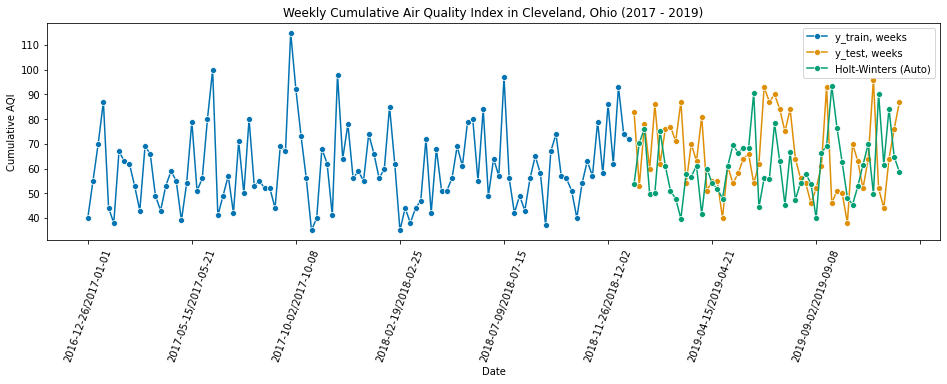

In [50]:
hw_model_w = AutoETS(auto=True, sp=52, n_jobs=-1, trace=True, disp=True)
hw_model_w.fit(y_w_train_float)
hw_preds_w = hw_model_w.predict(num_weeks)
plot_series(y_w_train_float, y_w_test, hw_preds_w, labels=['y_train, weeks', 'y_test, weeks', 'Holt-Winters (Auto)'])
plt.xticks(rotation=70)
plt.xlabel('Date')
plt.ylabel('Cumulative AQI')
plt.title('Weekly Cumulative Air Quality Index in Cleveland, Ohio (2017 - 2019)');

In [51]:
round(mse(y_w_test, hw_preds_w, squared=False), 0)

22.0

## Holt-Winters, Manual by Weeks
[(back to top)](#Modelling-with-Time-Series)

(About the same as the Auto)

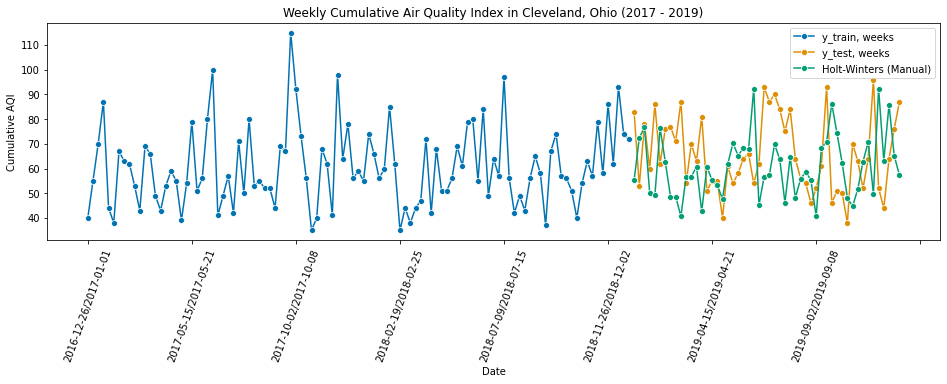

In [52]:
hwm_model_w = AutoETS(
    error='add', trend='add', seasonal='mul', 
    sp=52, n_jobs=-1, trace=True, disp=True, 
    suppress_warnings=True
)
hwm_model_w.fit(y_w_train_float)
hwm_preds_w = hwm_model_w.predict(num_weeks)
plot_series(y_w_train_float, y_w_test, hwm_preds_w, labels=['y_train, weeks', 'y_test, weeks', 'Holt-Winters (Manual)'])
plt.xticks(rotation=70)
plt.xlabel('Date')
plt.ylabel('Cumulative AQI')
plt.title('Weekly Cumulative Air Quality Index in Cleveland, Ohio (2017 - 2019)');

In [53]:
round(mse(y_w_test, hwm_preds_w, squared=False), 0)

22.0

## Ensemble Forecasts, by Weeks
[(back to top)](#Modelling-with-Time-Series)

This appears to fit better than SARIMA, but the RMSE scores a little worse, but not enough to dismiss. 

Will probably use this model if we use a time series model.

SARIMA / HOLT-WINTERS
---------------------



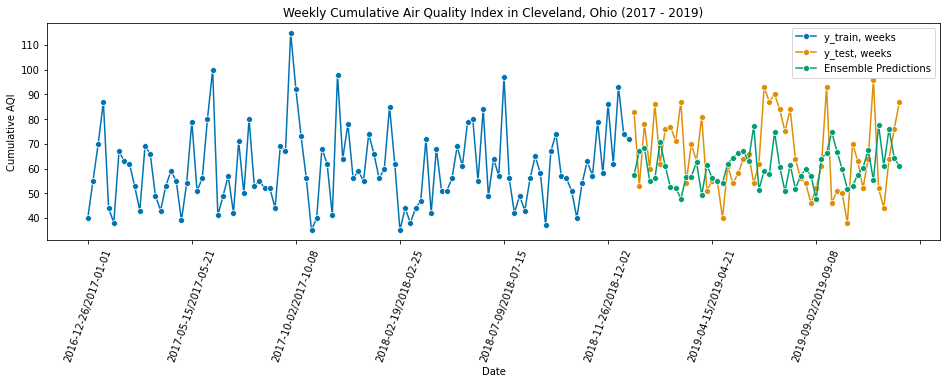

In [54]:
forecaster_w = EnsembleForecaster([
    ('sarima', sarima_model_w),
    ('hw', hw_model_w)], 
    n_jobs=-1
)

forecaster_w.fit(y_w_train_float)
ensemble_preds_w = forecaster_w.predict(num_weeks)
print('SARIMA / HOLT-WINTERS\n---------------------\n')
plot_series(y_w_train_float, y_w_test, ensemble_preds_w, labels=['y_train, weeks', 'y_test, weeks', 'Ensemble Predictions'])
plt.xticks(rotation=70)
plt.xlabel('Date')
plt.ylabel('Cumulative AQI')
plt.title('Weekly Cumulative Air Quality Index in Cleveland, Ohio (2017 - 2019)');

In [55]:
round(mse(y_w_test, ensemble_preds_w, squared=False), 0)

18.0

# Save Time Series Model
[(back to top)](#Modelling-with-Time-Series)

In [56]:
# model = forecaster_w
# filename = '../models/timeseries_model_1.pkl'

# with open(filename, 'wb') as file:
#     pickle.dump(model, file)

In [57]:
# # Import Model
# with open('timeseries_model_1.pkl', 'rb') as f:
#     model = pickle.load(f)